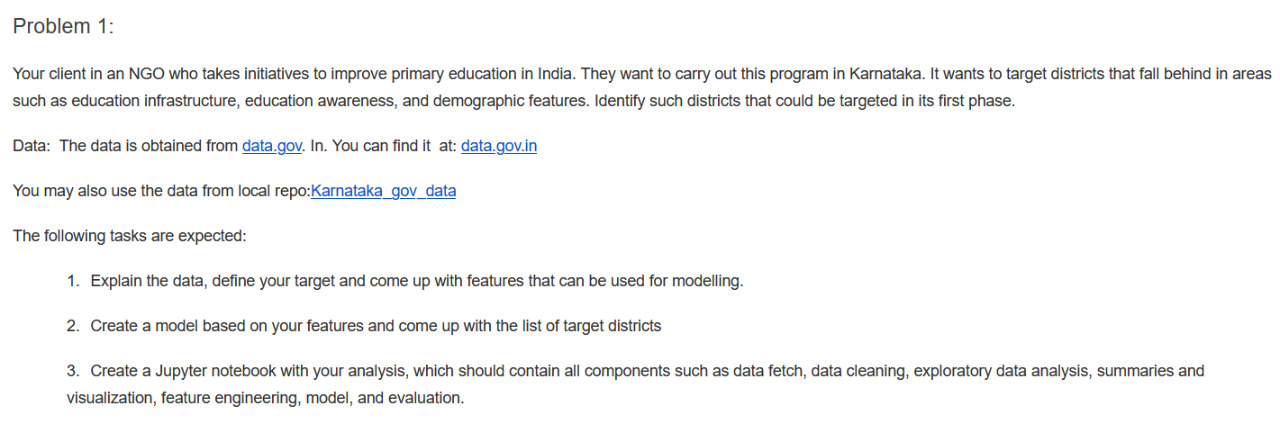

#### Steps to be performed:
1. Import Required Libraries and Data files.
2. Clean the data: Remove missing values or impute them.
3. Visualize and Understand the Data.
4. Perform the Outlier Analysis on the dataset, before or after performing PCA
5. Scale or Standardize the data
6. Perform PCA on the dataset and obtain the new dataset with the Principal Components. 
7. Choose the appropriate number of components k. 
8. Perform clustering activity on this new dataset, i.e. the PCA modified dataset with the k components.
9. Perform K-means clustering


### Assumptions

Since our focus is to improve primary education. Age column might be the key for analysis. But Im not giving much importance to Age column.Because if i remove ppl under 15 Im losing nearly 70 approx of data. 


### Findings

1. There are totally 20 districts involved in this study. Every district falls under Urban category.
2. Table Name,State Code,Total/ Rural/ Urban columns has constant values and dropping it.

NOTE : Have added findings in necessary section along the code

In [72]:
#importing libraries
import pandas as pd
import numpy as np
#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Adjusting Jupyter View
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
import missingno as mn
from numpy.random import uniform

from random import sample
from math import isnan

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# for Q-Q plots
import scipy.stats as stats

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [4]:
from random import sample

In [5]:
#importing excel file
data = pd.read_excel('Town-wise-education.xlsx')
data.head()  

,Table Name,State Code,District Code,Town Code,Total/ Rural/ Urban,Area Name,Age-Group,Total - Persons,Total - Males,Total - Females,Illiterate - Persons,Illiterate - Males,Illiterate - Females,Literate - Persons,Literate - Males,Literate - Females,Educational Level - Literate without Educational Level Persons,Educational Level - Literate without Educational Level Males,Educational Level - Literate without Educational Level Females,Educational Level - Below Primary Persons,Educational Level - Below Primary Males,Educational Level - Below Primary Females,Educational Level - Primary Persons,Educational Level - Primary Males,Educational Level - Primary Females,Educational Level - Middle Persons,Educational Level - Middle Males,Educational Level - Middle Females,Educational Level - Matric/Secondary Persons,Educational Level - Matric/Secondary Males,Educational Level - Matric/Secondary Females,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Persons,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Males,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Females,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Graduate & Above Persons,Educational Level - Graduate & Above Males,Educational Level - Graduate & Above Females,Unclassified - Persons,Unclassified - Males,Unclassified - Females
0,C2308,29,1,40117000,Urban,Belgaum (M Corp.),All ages,399653,204598,195055,91358,36857,54501,308295,167741,140554,3510,1821,1689,50022,25892,24130,69598,34031,35567,29442,15986,13456,74529,39027,35502,31525,18275,13250,1371,1009,362,7143,5210,1933,41152,26488,14664,3,2,1
1,C2308,29,1,40117000,Urban,Belgaum (M Corp.),0-6,47642,24768,22874,47642,24768,22874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,C2308,29,1,40117000,Urban,Belgaum (M Corp.),7,6759,3495,3264,1375,662,713,5384,2833,2551,48,28,20,5336,2805,2531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,C2308,29,1,40117000,Urban,Belgaum (M Corp.),8,8067,4152,3915,568,292,276,7499,3860,3639,15,11,4,7484,3849,3635,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,C2308,29,1,40117000,Urban,Belgaum (M Corp.),9,6948,3559,3389,275,137,138,6673,3422,3251,11,4,7,6291,3235,3056,371,183,188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
#total shape of data
print('The total rows {} and columns {} in data'.format(data.shape[0], data.shape[1]))
print("Database size is :",data.size)

The total rows 812 and columns 46 in data
Database size is : 37352


In [7]:
#Missing_Values Treatment
df1 = data.isnull().sum().to_frame().rename(columns = {0:'Train_Null_Values'})
df2 = data.dtypes.to_frame().rename(columns = {0:'Dtypes'})
df = pd.concat([df1, df2], axis=1)
df

,Train_Null_Values,Dtypes
Table Name,0,object
State Code,0,int64
District Code,0,int64
Town Code,0,int64
Total/ Rural/ Urban,0,object
Area Name,0,object
Age-Group,0,object
Total - Persons,0,int64
Total - Males,0,int64
Total - Females,0,int64


### There are no missing values in dataframe

In [8]:
#concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 46 columns):
 #   Column                                                                                     Non-Null Count  Dtype 
---  ------                                                                                     --------------  ----- 
 0   Table Name                                                                                 812 non-null    object
 1   State Code                                                                                 812 non-null    int64 
 2   District Code                                                                              812 non-null    int64 
 3   Town Code                                                                                  812 non-null    int64 
 4   Total/ Rural/ Urban                                                                        812 non-null    object
 5   Area Name                                                

In [9]:
#total statistics summary of a DataFrame
data.describe()

,State Code,District Code,Town Code,Total - Persons,Total - Males,Total - Females,Illiterate - Persons,Illiterate - Males,Illiterate - Females,Literate - Persons,Literate - Males,Literate - Females,Educational Level - Literate without Educational Level Persons,Educational Level - Literate without Educational Level Males,Educational Level - Literate without Educational Level Females,Educational Level - Below Primary Persons,Educational Level - Below Primary Males,Educational Level - Below Primary Females,Educational Level - Primary Persons,Educational Level - Primary Males,Educational Level - Primary Females,Educational Level - Middle Persons,Educational Level - Middle Males,Educational Level - Middle Females,Educational Level - Matric/Secondary Persons,Educational Level - Matric/Secondary Males,Educational Level - Matric/Secondary Females,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Persons,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Males,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Females,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Graduate & Above Persons,Educational Level - Graduate & Above Males,Educational Level - Graduate & Above Females,Unclassified - Persons,Unclassified - Males,Unclassified - Females
count,812.0,812.000000,8.120000e+02,8.120000e+02,8.120000e+02,8.120000e+02,8.120000e+02,812.000000,812.000000,8.120000e+02,8.120000e+02,8.120000e+02,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,29.0,15.035714,4.150982e+07,2.750764e+04,1.422253e+04,1.328511e+04,7.275195e+03,3113.495074,4161.699507,2.023245e+04,1.110903e+04,9.123414e+03,222.815271,116.926108,105.889163,3026.500000,1552.482759,1474.017241,4419.667488,2211.697044,2207.970443,2352.687192,1239.633005,1113.054187,4589.071429,2519.426108,2069.645320,1982.330049,1104.770936,877.559113,113.911330,87.391626,26.519704,482.088670,371.315271,110.773399,3043.322660,1905.359606,1137.963054,0.054187,0.032020,0.022167
std,0.0,6.714906,6.718245e+05,1.640983e+05,8.543287e+04,7.867390e+04,4.341504e+04,19577.631904,23934.190637,1.242060e+05,6.798408e+04,5.623801e+04,1423.660022,737.500726,686.664953,16657.164918,8565.671068,8093.347409,24555.900008,12290.317825,12268.475460,14616.730895,7589.470779,7030.964568,29706.334432,16232.342533,13481.837934,12429.201584,6720.924734,5717.439588,977.313511,740.415426,239.305779,3034.946141,2344.507666,693.711738,22771.068866,13770.026347,9031.484770,0.429515,0.279085,0.220975
min,29.0,1.000000,4.011700e+07,5.000000e+01,2.300000e+01,2.700000e+01,2.300000e+01,8.000000,15.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.0,11.250000,4.112700e+07,2.916000e+03,1.466750e+03,1.425250e+03,2.950000e+02,121.000000,158.500000,2.213500e+03,1.199750e+03,9.930000e+02,13.000000,7.000000,5.750000,183.500000,96.750000,81.750000,294.000000,167.000000,138.000000,28.750000,19.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [10]:
# Null & Duplicate Analysis
# Checking for duplicates rows of data
data_duplicate = data.copy()
data_duplicate.drop_duplicates(subset=None, inplace=True)
data_duplicate.shape

(812, 46)

### The data size before and after removal of duplicate is same, indicating that there is no duplicate in the dataset. 

In [11]:
# Dropping records 'Age not stated' and 'All ages' because the data is reduntant and 7% of data is lost. 
data.drop(data[data['Age-Group'] =='All ages' ].index, inplace = True)
data.drop(data[data['Age-Group'] =='Age not stated' ].index, inplace = True)
#data['Age-Group'] = data['Age-Group']['Age not stated'] = -999

In [12]:
# Using univariate analysis to check histogram , QQ-plot and box plot for numerical variables
def diagnostic_plots(df,  variable, vartype):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [13]:
features = ['State Code','District Code','Town Code','Total - Persons','Total - Males','Total - Females','Illiterate - Persons','Illiterate - Males',
 'Illiterate - Females','Literate - Persons','Literate - Males','Literate - Females','Educational Level - Literate without Educational Level Persons',
 'Educational Level - Literate without Educational Level Males','Educational Level - Literate without Educational Level Females',
'Educational Level - Below Primary Persons','Educational Level - Below Primary Males','Educational Level - Below Primary Females',
 'Educational Level - Primary Persons','Educational Level - Primary Males','Educational Level - Primary Females',
 'Educational Level - Middle Persons','Educational Level - Middle Males','Educational Level - Middle Females',
 'Educational Level - Matric/Secondary Persons','Educational Level - Matric/Secondary Males','Educational Level - Matric/Secondary Females',
 'Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Persons','Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Males',
'Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Females','Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Persons',
 'Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Males', 'Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Females',
 'Educational Level - Technical Diploma or Certificate Not Equal to Degree Persons', 'Educational Level - Technical Diploma or Certificate Not Equal to Degree Males',
 'Educational Level - Technical Diploma or Certificate Not Equal to Degree Females', 'Educational Level - Graduate & Above Persons',
 'Educational Level - Graduate & Above Males', 'Educational Level - Graduate & Above Females']

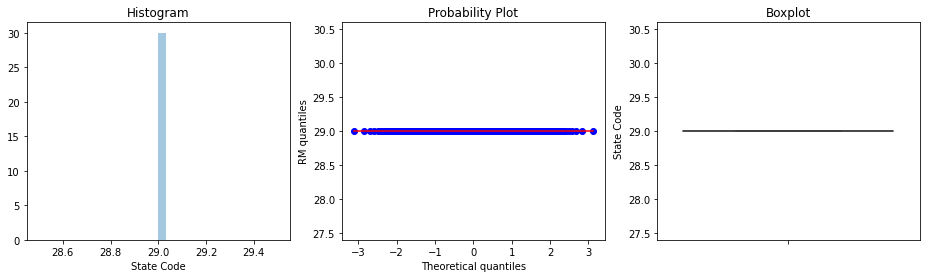

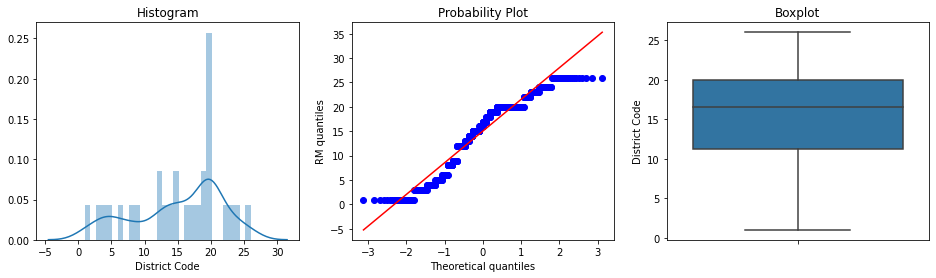

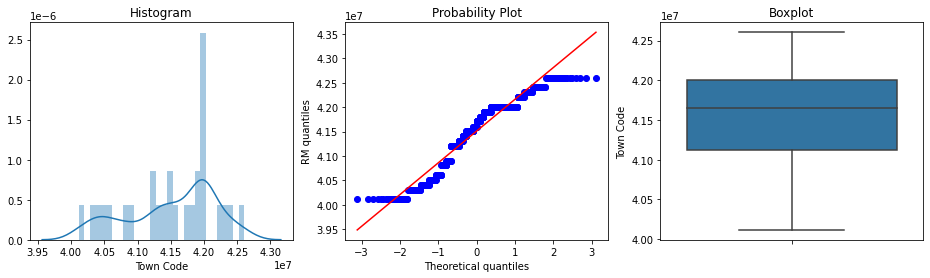

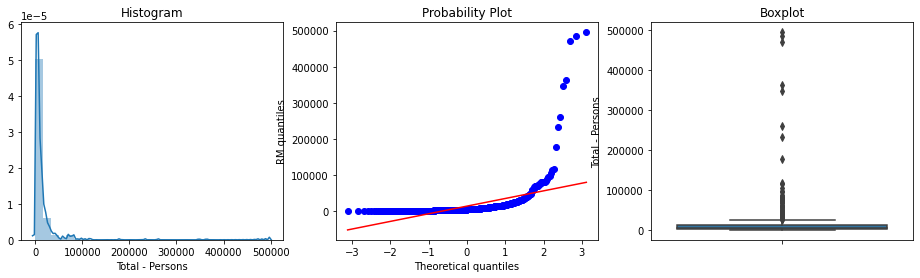

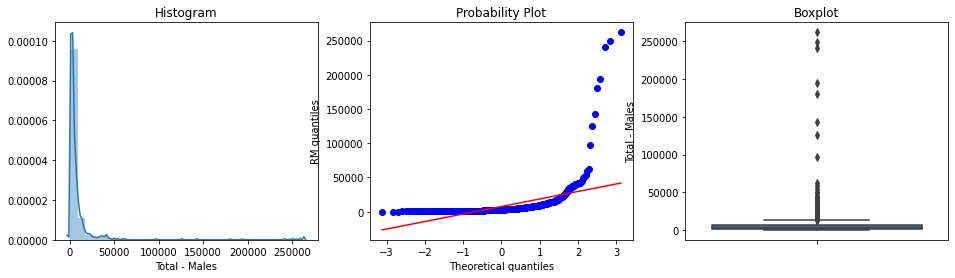

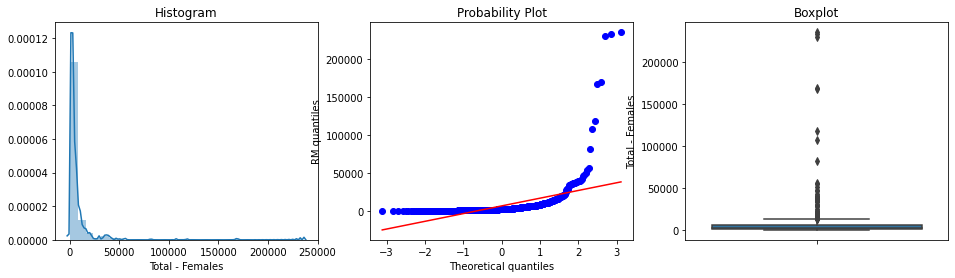

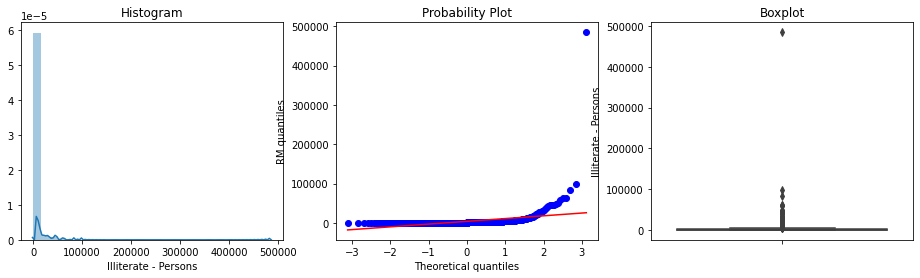

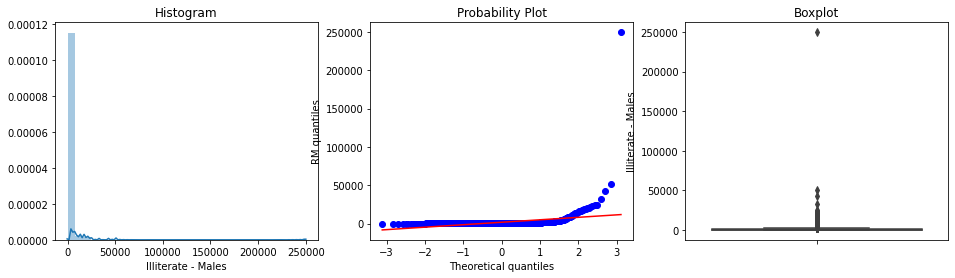

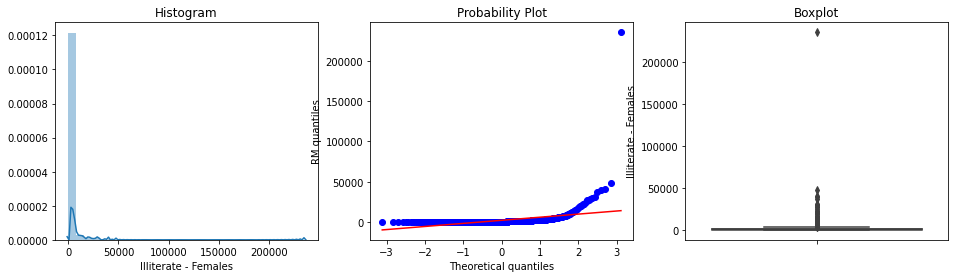

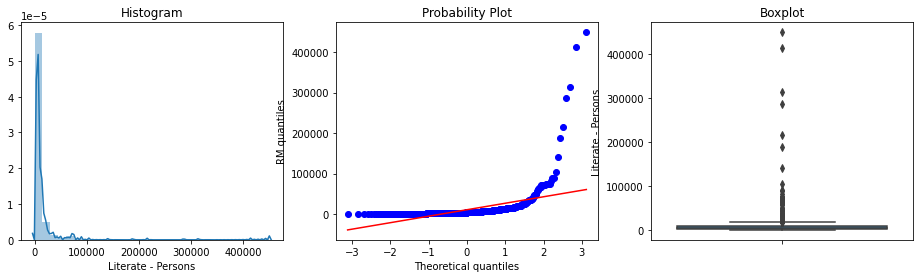

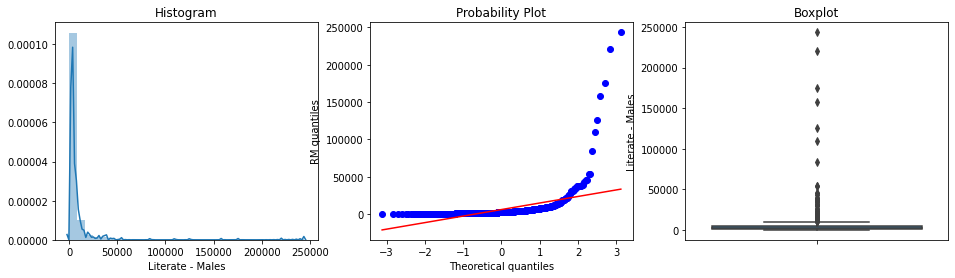

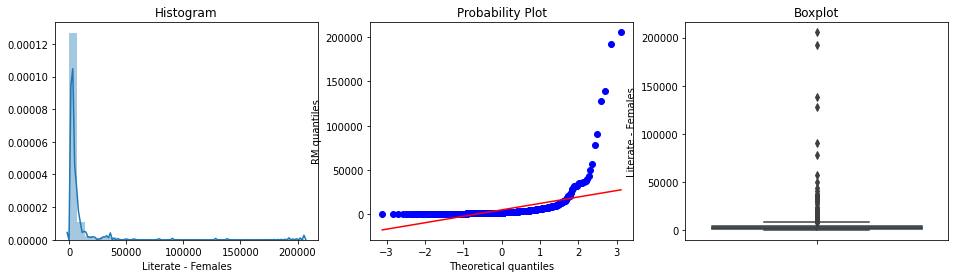

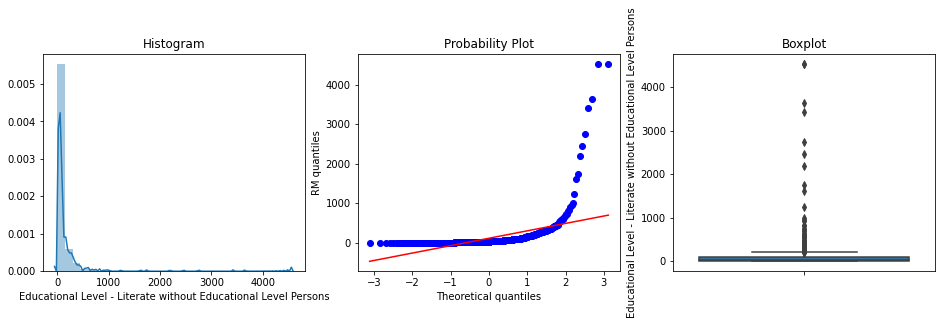

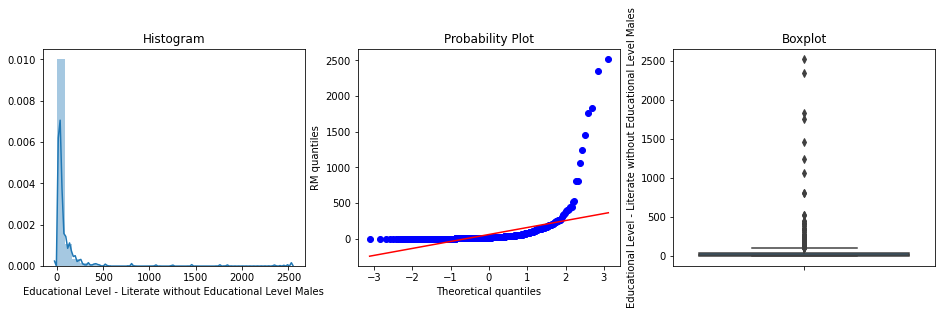

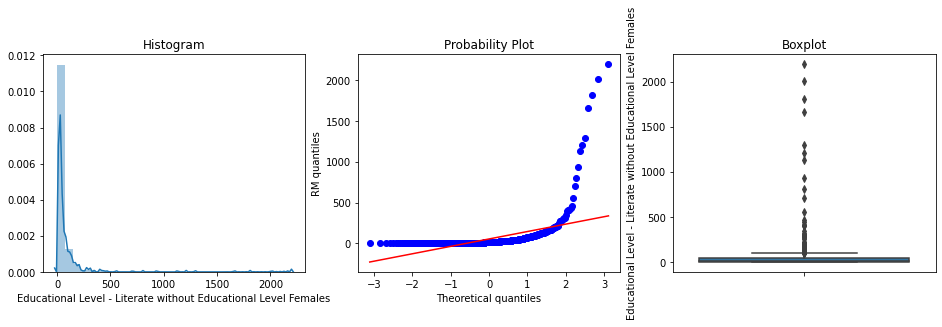

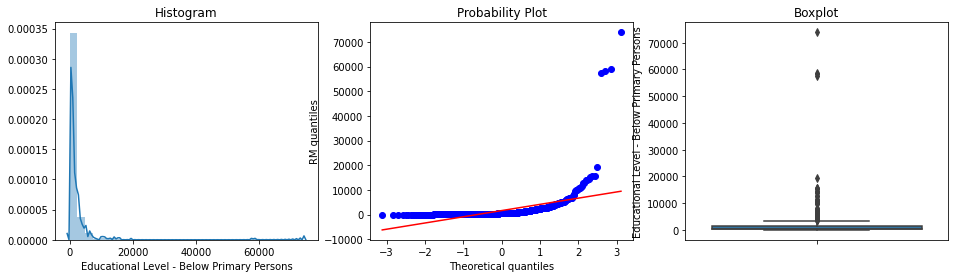

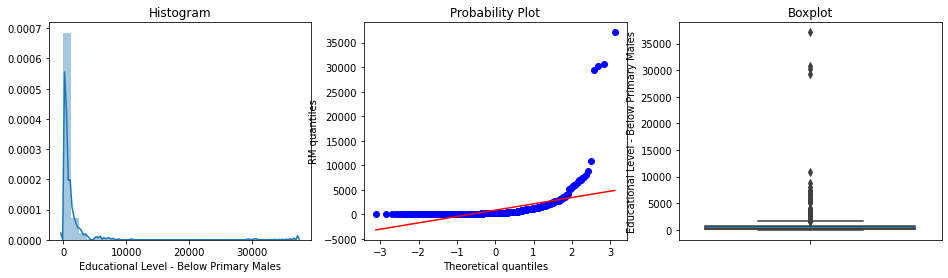

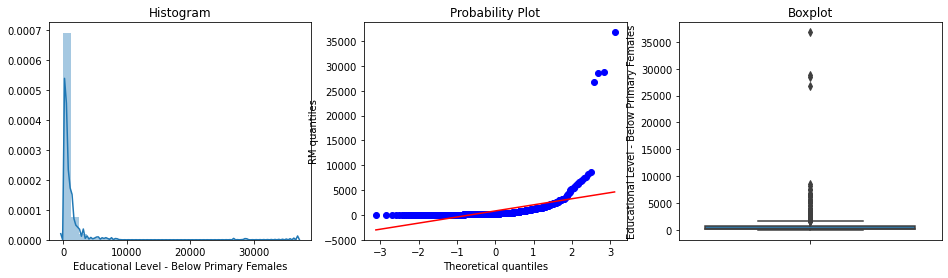

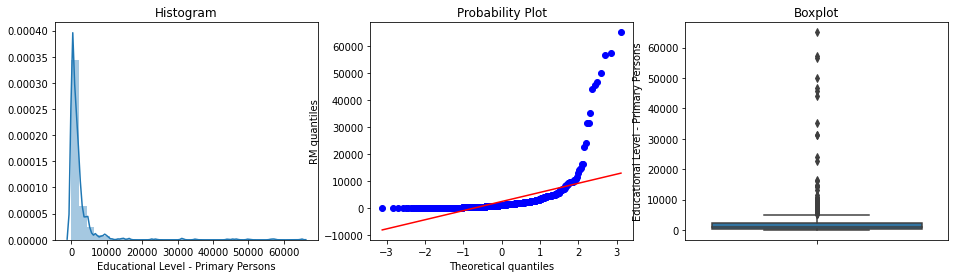

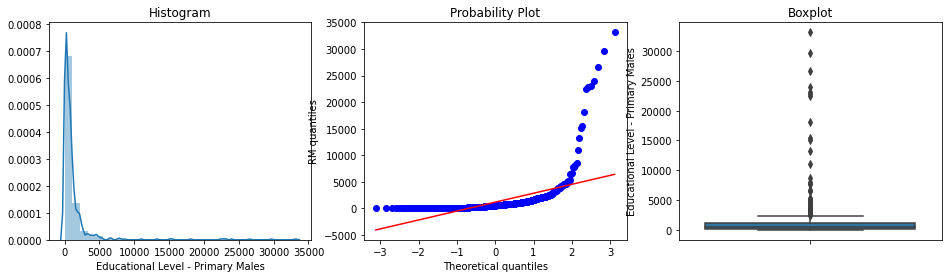

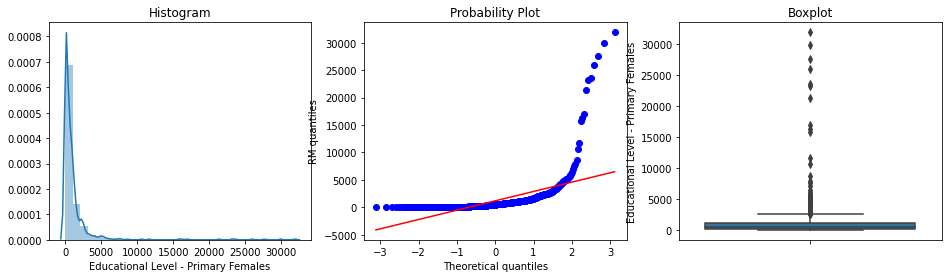

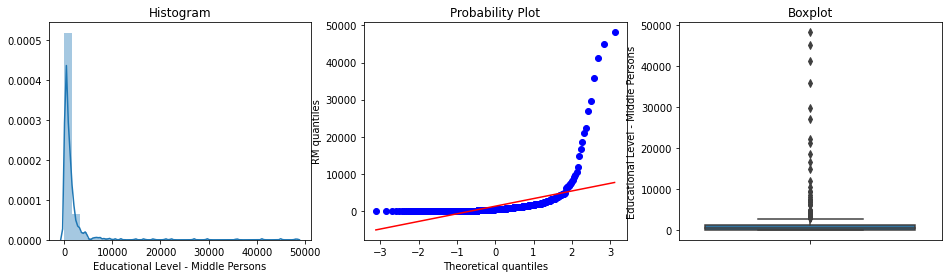

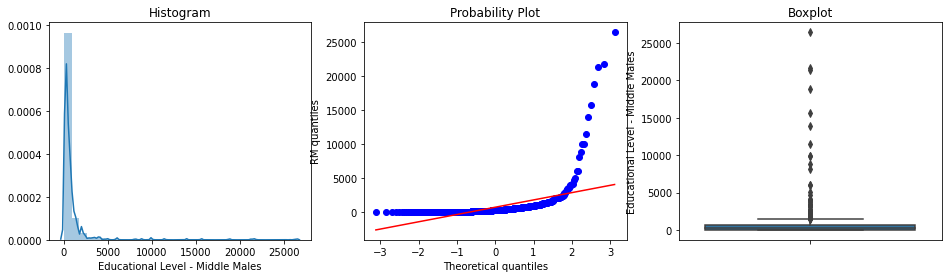

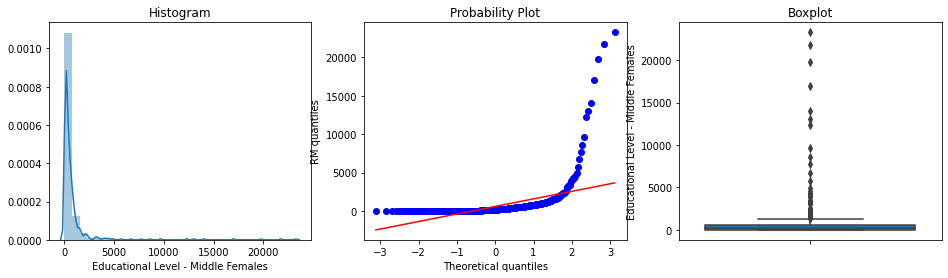

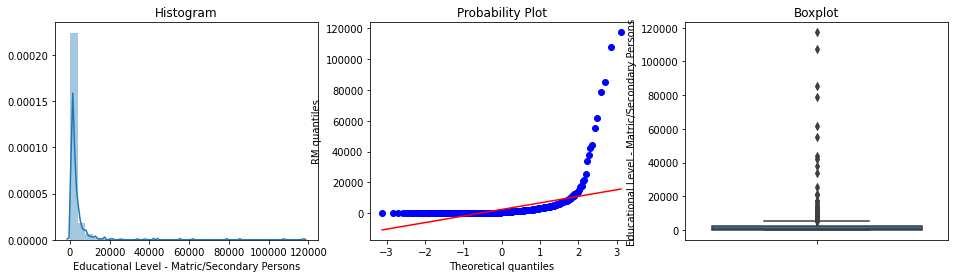

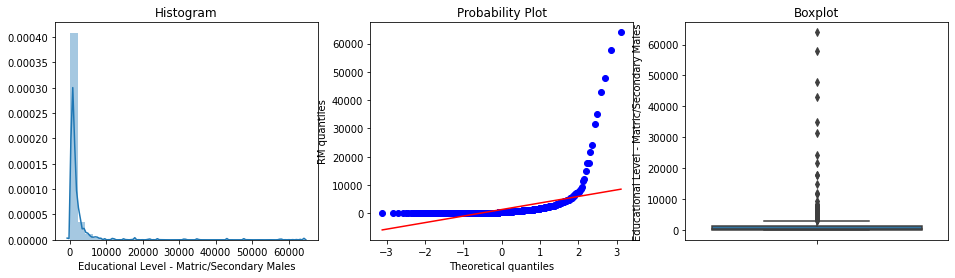

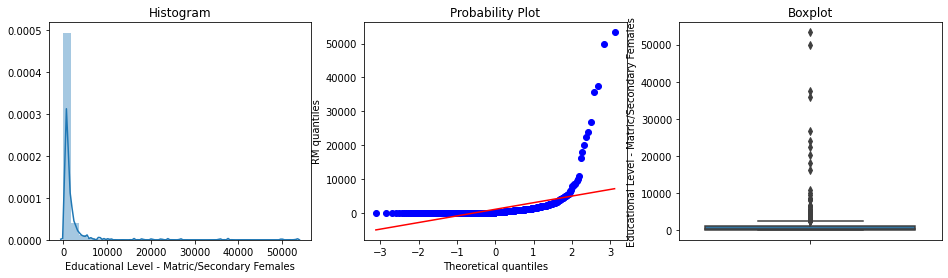

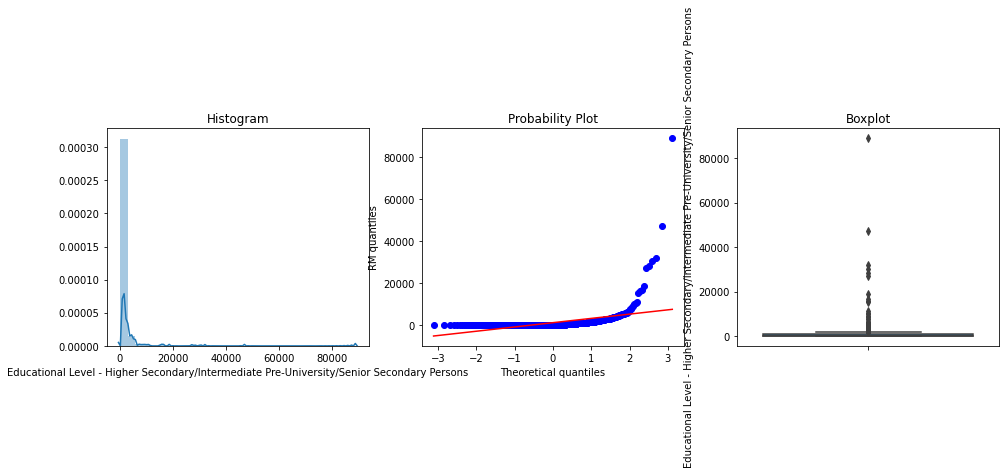

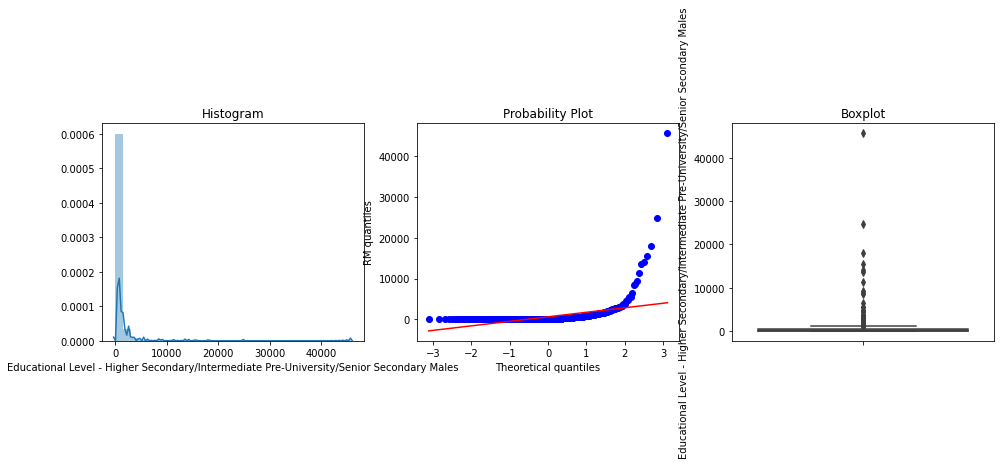

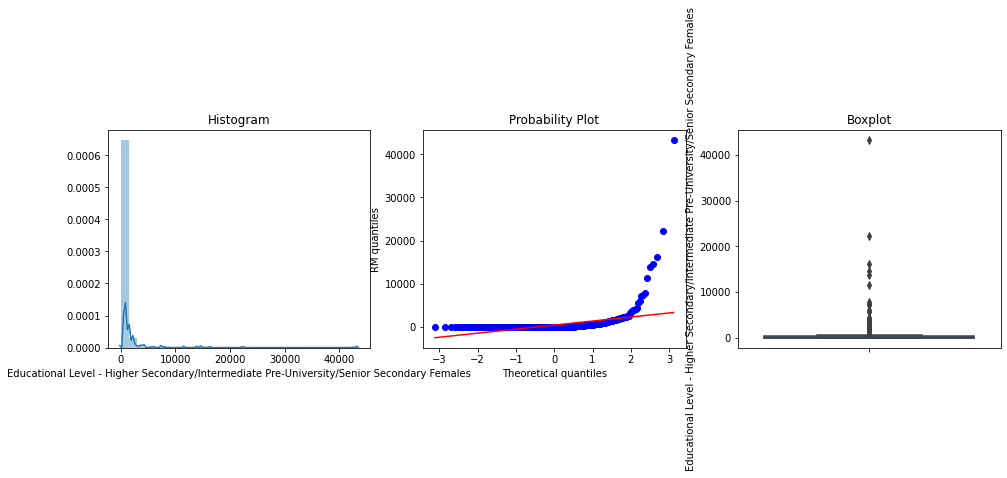

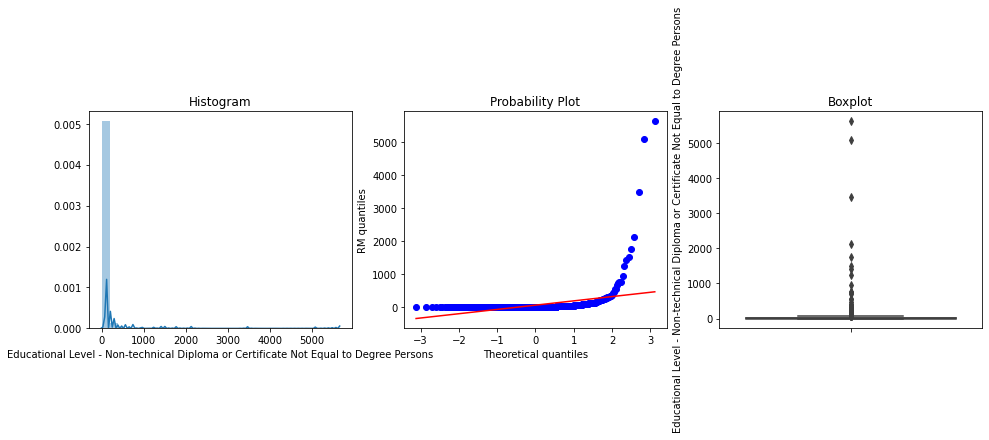

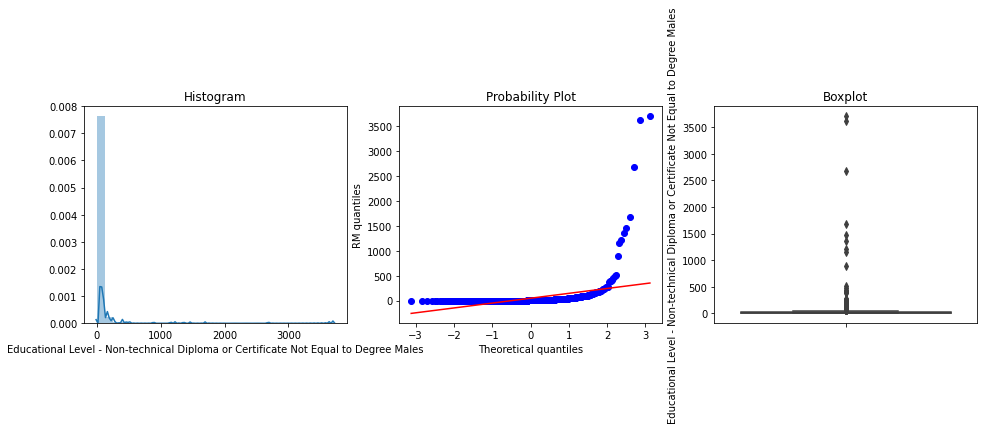

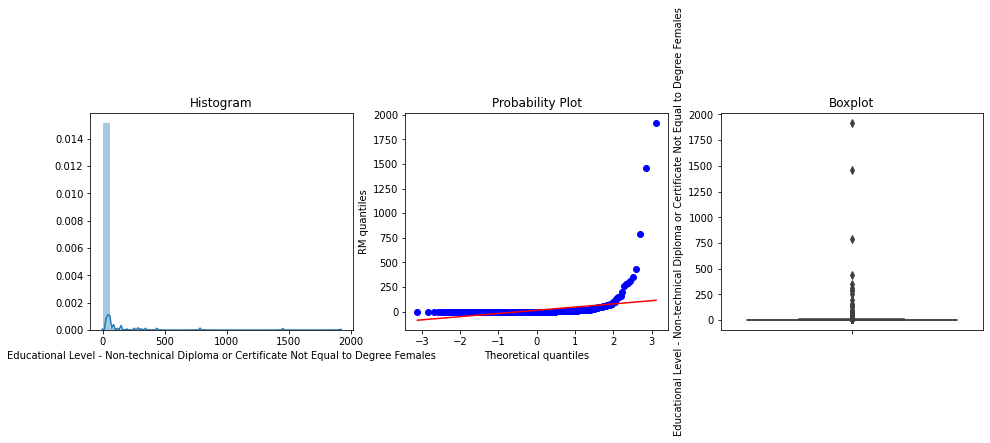

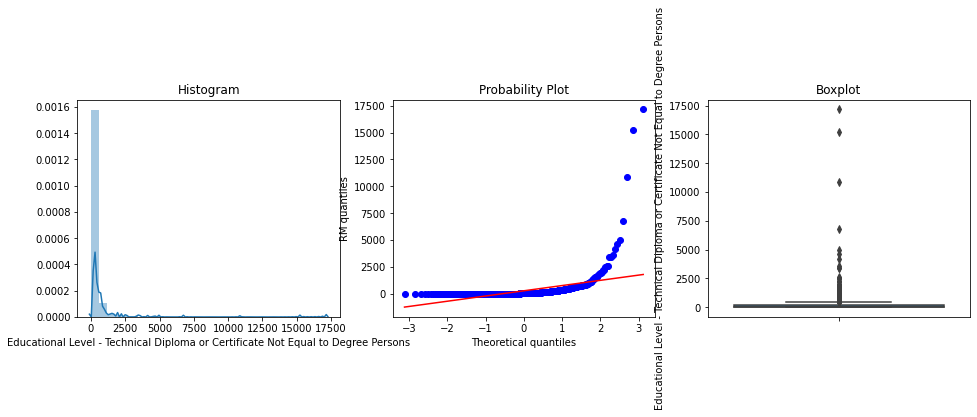

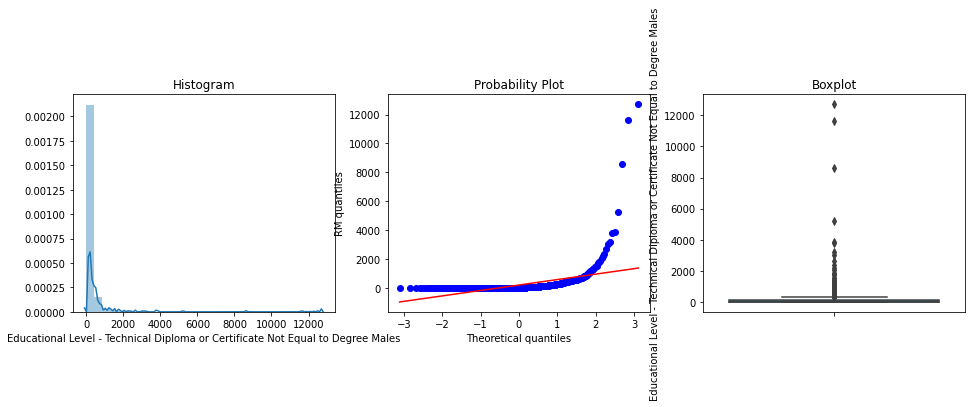

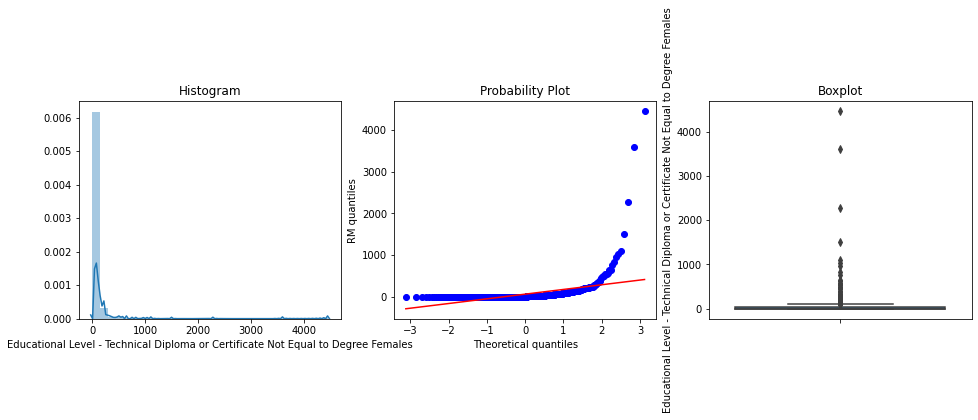

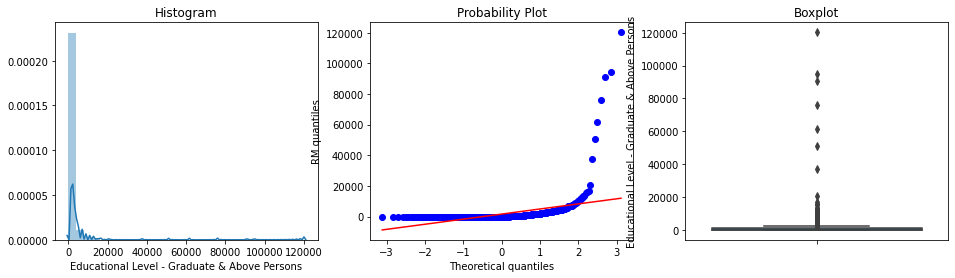

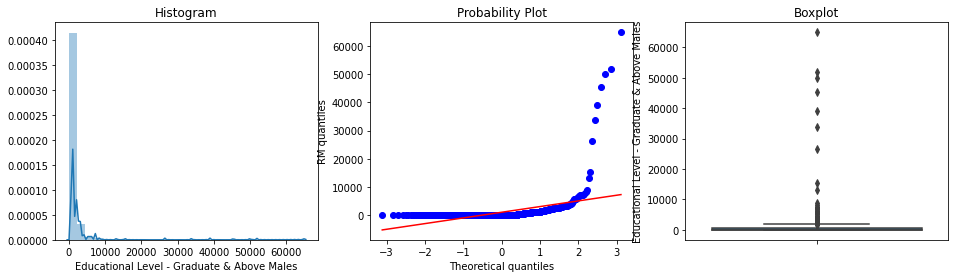

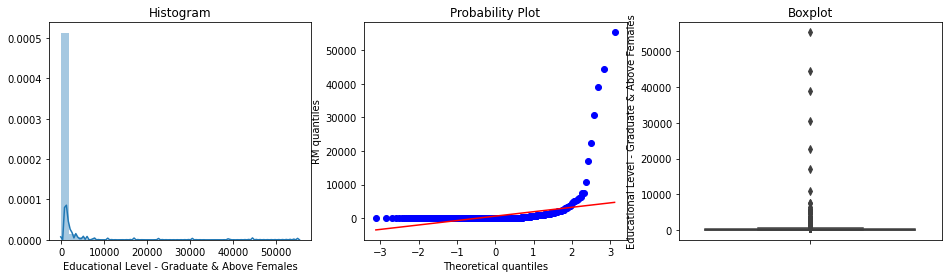

In [14]:
#Plotting only numerical features
col_graph = data[features]
for item in col_graph:
    diagnostic_plots(df=data,variable=item,vartype=1)

### Findings :
1. Most of the data follows positive skewed distrubtion
2. Except for district code and town code

In [15]:
#Groupby function used for District Code and Town Code
data.groupby(['District Code','Town Code'])[['Town Code']].count().sort_values(by='District Code', ascending = False)

Town Code
District Code Town Code           
26            42604000          27
24            42405000          27
23            42305000          27
22            42206000          27
20            42013000          27
              42011000          27
              42010000          27
              42009000          27
              42005000          27
              42001000          27
19            41911000          27
              41908000          27
18            41806000          27
17            41707000          27
16            41603000          27
15            41509000          27
              41508000          27
14            41404000          27
13            41303000          27
12            41207000          27
              41202000          27
9             40902000          27
8             40805000          27
6             40607000          27
5             40503000          27
4             40403000          27
3             40301000          27
1             40117000          27

### Findings :

1. District 20 has 6 different town codes
2. District 19 has 2 different town codes
3. District 15 has 2  different town codes
4. District 12 has 2 different town codes

# Prepare Data for modelling

#### Statistical Outlier Analysis before PCA

In [16]:
# Derive Outlier ranges
Q1=data.quantile(0.05)
Q3=data.quantile(0.95)
IQR=Q3-Q1

In [17]:
# Prepare dataframe for the obtained Quantile and IQR
q1=pd.DataFrame(Q1)
q3=pd.DataFrame(Q3)
iqr=pd.DataFrame(IQR)

iqr=pd.concat([q1,q3,iqr],axis=1)

iqr.columns=['Quantile 0.05','Quantile 0.95','IQR']

In [18]:
# Calculate the lower and Upper outlier limit
iqr['lower limit']=iqr['Quantile 0.05']-1.5*iqr['IQR']
iqr['upper limit']=iqr['Quantile 0.95']+1.5*iqr['IQR']

In [19]:
# Display the limits for 5 columns alone
iqr.head()

,Quantile 0.05,Quantile 0.95,IQR,lower limit,upper limit
State Code,29.00,29.00,0.00,2.900000e+01,2.900000e+01
District Code,3.00,24.00,21.00,-2.850000e+01,5.550000e+01
Town Code,40301000.00,42405000.00,2104000.00,3.714500e+07,4.556100e+07
Total - Persons,1333.50,47066.75,45733.25,-6.726638e+04,1.156666e+05
Total - Males,646.75,24864.75,24218.00,-3.568025e+04,6.119175e+04


In [20]:
# Check for Statistical outliers in Data
for i in iqr.index:
    print('\b', i)
    outlier_count = ((data[i] <= iqr[iqr.index == i]['lower limit'].values[0]) |
           (data[i] >= iqr[iqr.index == i]['upper limit'].values[0])).sum()
    print('No.of Outliers: ', outlier_count)
    if outlier_count>0:
        print(data[((data[i] <= iqr[iqr.index == i]['lower limit'].values[0]) |
           (data[i] >= iqr[iqr.index == i]['upper limit'].values[0]))])
    print('\n')

 State Code
No.of Outliers:  756
    Table Name  State Code  District Code  Town Code Total/ Rural/ Urban          Area Name Age-Group  Total - Persons  Total - Males  Total - Females  Illiterate - Persons  Illiterate - Males  Illiterate - Females  Literate - Persons  Literate - Males  Literate - Females  Educational Level - Literate without Educational Level Persons  Educational Level - Literate without Educational Level Males  Educational Level - Literate without Educational Level Females  Educational Level - Below Primary Persons  Educational Level - Below Primary Males  Educational Level - Below Primary Females  Educational Level - Primary Persons  Educational Level - Primary Males  Educational Level - Primary Females  Educational Level - Middle Persons  Educational Level - Middle Males  Educational Level - Middle Females  Educational Level - Matric/Secondary Persons  Educational Level - Matric/Secondary Males  Educational Level - Matric/Secondary Females  \
1        C2308        

    Table Name  State Code  District Code  Town Code Total/ Rural/ Urban                Area Name Age-Group  Total - Persons  Total - Males  Total - Females  Illiterate - Persons  Illiterate - Males  Illiterate - Females  Literate - Persons  Literate - Males  Literate - Females  Educational Level - Literate without Educational Level Persons  Educational Level - Literate without Educational Level Males  Educational Level - Literate without Educational Level Females  Educational Level - Below Primary Persons  Educational Level - Below Primary Males  Educational Level - Below Primary Females  Educational Level - Primary Persons  Educational Level - Primary Males  Educational Level - Primary Females  Educational Level - Middle Persons  Educational Level - Middle Males  Educational Level - Middle Females  Educational Level - Matric/Secondary Persons  Educational Level - Matric/Secondary Males  Educational Level - Matric/Secondary Females  \
1        C2308          29              1   401170

    Table Name  State Code  District Code  Town Code Total/ Rural/ Urban            Area Name Age-Group  Total - Persons  Total - Males  Total - Females  Illiterate - Persons  Illiterate - Males  Illiterate - Females  Literate - Persons  Literate - Males  Literate - Females  Educational Level - Literate without Educational Level Persons  Educational Level - Literate without Educational Level Males  Educational Level - Literate without Educational Level Females  Educational Level - Below Primary Persons  Educational Level - Below Primary Males  Educational Level - Below Primary Females  Educational Level - Primary Persons  Educational Level - Primary Males  Educational Level - Primary Females  Educational Level - Middle Persons  Educational Level - Middle Males  Educational Level - Middle Females  Educational Level - Matric/Secondary Persons  Educational Level - Matric/Secondary Males  Educational Level - Matric/Secondary Females  \
585      C2308          29             20   42009000  

    Table Name  State Code  District Code  Town Code Total/ Rural/ Urban                Area Name Age-Group  Total - Persons  Total - Males  Total - Females  Illiterate - Persons  Illiterate - Males  Illiterate - Females  Literate - Persons  Literate - Males  Literate - Females  Educational Level - Literate without Educational Level Persons  Educational Level - Literate without Educational Level Males  Educational Level - Literate without Educational Level Females  Educational Level - Below Primary Persons  Educational Level - Below Primary Males  Educational Level - Below Primary Females  Educational Level - Primary Persons  Educational Level - Primary Males  Educational Level - Primary Females  Educational Level - Middle Persons  Educational Level - Middle Males  Educational Level - Middle Females  Educational Level - Matric/Secondary Persons  Educational Level - Matric/Secondary Males  Educational Level - Matric/Secondary Females  \
189      C2308          29              9   409020

No.of Outliers:  13
    Table Name  State Code  District Code  Town Code Total/ Rural/ Urban                Area Name Age-Group  Total - Persons  Total - Males  Total - Females  Illiterate - Persons  Illiterate - Males  Illiterate - Females  Literate - Persons  Literate - Males  Literate - Females  Educational Level - Literate without Educational Level Persons  Educational Level - Literate without Educational Level Males  Educational Level - Literate without Educational Level Females  Educational Level - Below Primary Persons  Educational Level - Below Primary Males  Educational Level - Below Primary Females  Educational Level - Primary Persons  Educational Level - Primary Males  Educational Level - Primary Females  Educational Level - Middle Persons  Educational Level - Middle Males  Educational Level - Middle Females  Educational Level - Matric/Secondary Persons  Educational Level - Matric/Secondary Males  Educational Level - Matric/Secondary Females  \
190      C2308          29    

### Findings :

1. Ignore State Code,District Code 	and  Town Code from the above results.
2. I'm planning to keep the outliers as they are valid outliers

#### Scaling or Standardizing data

In [21]:
data_df = data.copy()

In [22]:
data_df.drop(['Table Name','Total/ Rural/ Urban'], axis =1, inplace = True)

In [23]:
# Instantiate Scaler
scaler=StandardScaler()

#Fit and transform Data
data_scaled_matrix=scaler.fit_transform(data_df[data_df.columns.difference(['Total/ Rural/ Urban','Area Name','Age-Group'])])

In [24]:
data_scaled_matrix

array([[-2.09152058, -0.32587501, -0.32580426, ..., -0.08481889,
        -0.11543363, -0.1345572 ],
       [-2.09152058,  0.7166805 ,  0.77097997, ..., -0.08481889,
        -0.11543363, -0.1345572 ],
       [-2.09152058,  1.17143407,  1.17919484, ..., -0.08481889,
        -0.11543363, -0.1345572 ],
       ...,
       [ 1.63383414, -0.10591269, -0.14828553, ..., -0.08481889,
        -0.11543363, -0.1345572 ],
       [ 1.63383414, -0.18953133, -0.24760218, ..., -0.08481889,
        -0.11543363, -0.1345572 ],
       [ 1.63383414, -0.12444884, -0.21553932, ..., -0.08481889,
        -0.11543363, -0.1345572 ]])

In [25]:
data_scaled_matrix.shape

(756, 42)

### Find Principal components / New Basis Vectors using PCA

In [26]:
## Apply PCA
pca=PCA(random_state=46)
pca.fit(data_scaled_matrix)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=46,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
# New Basis Vector
pca.components_

array([[ 1.70917009e-02,  5.82536497e-02,  5.79452454e-02, ...,
         7.73749903e-02,  6.54179998e-02,  9.52752925e-02],
       [ 1.27362106e-02,  1.06548535e-01,  1.03594069e-01, ...,
        -4.73637832e-02,  7.98314847e-03, -2.52395315e-02],
       [ 5.27561474e-02,  5.24013767e-01,  5.27978709e-01, ...,
        -5.12884690e-02, -2.12792961e-03, -3.47511357e-02],
       ...,
       [ 0.00000000e+00,  4.64797086e-02, -5.28463629e-02, ...,
         1.50912657e-02,  1.60112754e-02, -2.32462541e-02],
       [ 0.00000000e+00, -1.76025779e-16, -5.00514306e-17, ...,
        -2.49236733e-17, -2.64450048e-17,  3.83944264e-17],
       [-0.00000000e+00, -7.91435208e-02,  1.06892268e-02, ...,
         1.09133410e-01,  1.15834880e-01, -1.68164915e-01]])

In [28]:
# % of variance in information for each dimension in the data
pca.explained_variance_ratio_

array([6.49748675e-01, 8.27767460e-02, 7.30434627e-02, 4.98094101e-02,
       4.07655893e-02, 3.64050588e-02, 2.33139298e-02, 1.71283131e-02,
       1.42401964e-02, 5.57180421e-03, 3.61809899e-03, 1.52783880e-03,
       8.44686865e-04, 5.69364644e-04, 2.08466528e-04, 1.55379321e-04,
       8.84221385e-05, 6.07932690e-05, 3.91478446e-05, 3.32892933e-05,
       2.26402736e-05, 1.83478494e-05, 9.97390625e-06, 3.65347687e-07,
       2.47272633e-32, 1.19178588e-32, 5.44830054e-33, 5.44830054e-33,
       5.44830054e-33, 5.44830054e-33, 5.44830054e-33, 5.44830054e-33,
       5.44830054e-33, 5.44830054e-33, 5.44830054e-33, 5.44830054e-33,
       5.44830054e-33, 5.44830054e-33, 5.44830054e-33, 5.44830054e-33,
       5.44830054e-33, 1.37931728e-33])

In [29]:
# Cummulative Variance Explained
var_cum=np.cumsum(pca.explained_variance_ratio_)

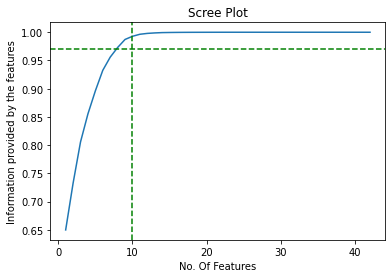

In [30]:
# Scree Plot
plt.plot(range(1,len(var_cum)+1),var_cum)
plt.axhline(y=0.97,color='green',linestyle='--')
plt.axvline(x=10,color='green',linestyle='--')
plt.xlabel('No. Of Features')
plt.ylabel('Information provided by the features')
plt.title('Scree Plot')
plt.show()

#### Findings:
1. We can see that 97% of information can be obtained by 8 or 9 features.
2. I'm not transforming the data with new basis vectors just yet, Lets do that by using Automatic feature selection functionality of PCA.

### Auto Select features using PCA

In [31]:
# Construct and apply PCA on data to retain 95% of variance / information
pca_auto = PCA(0.95)
data_pca_transform=pca_auto.fit_transform(data_scaled_matrix)

In [32]:
data_pca_transform

array([[-0.69155858,  4.0695607 , -1.68241566, ..., -0.91806689,
         0.01536335,  0.52684836],
       [-1.27586343,  0.15394291,  1.03844462, ..., -0.72921239,
        -0.37111241,  0.3571569 ],
       [-1.2021955 ,  0.24963755,  1.74675003, ..., -0.68725424,
        -0.52665376,  0.46025626],
       ...,
       [-0.50472792,  0.07431974,  0.0285339 , ...,  0.67681441,
        -0.26260507, -0.44816451],
       [-1.05592022, -0.10719861, -0.09943281, ...,  0.75420682,
        -0.35602784, -0.37311879],
       [-0.95890669, -0.0260987 , -0.02919143, ...,  0.75347753,
        -0.37408138, -0.42370424]])

In [33]:
data_pca_transform.shape

(756, 7)

<AxesSubplot:>

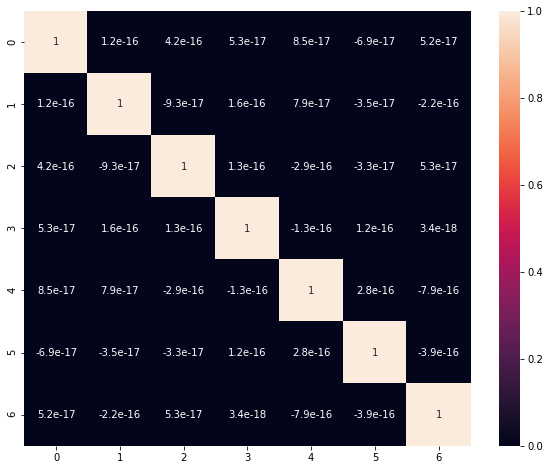

In [34]:
# Heat map for PCA transformed data
plt.figure(figsize=(10,8))
sns.heatmap(np.corrcoef(data_pca_transform.T),annot=True)

#### Insights:
1. As predicted Auto Feature selection functionality has selected 7 features.
2. After transforming the data with new basis none of the features are showing any correlation.

In [35]:
# Visulaize the new features
df_data_pca_transform = pd.DataFrame(data_pca_transform,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

In [36]:
df_data_pca_transform

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.691559,4.069561,-1.682416,2.693918,-0.918067,0.015363,0.526848
1,-1.275863,0.153943,1.038445,2.942365,-0.729212,-0.371112,0.357157
2,-1.202196,0.249638,1.746750,3.007610,-0.687254,-0.526654,0.460256
3,-1.251868,0.133751,1.392984,2.952925,-0.728476,-0.374217,0.426872
4,-0.955930,0.178649,1.645829,2.915934,-0.853554,-0.023005,0.412396
...,...,...,...,...,...,...,...
751,0.644972,0.271350,0.117948,-2.144199,0.560603,-0.202608,-0.616407
752,-0.084827,0.084669,0.080448,-2.162898,0.633573,-0.263321,-0.465586
753,-0.504728,0.074320,0.028534,-2.157876,0.676814,-0.262605,-0.448165
754,-1.055920,-0.107199,-0.099433,-2.165170,0.754207,-0.356028,-0.373119


In [37]:
df_data_pca_transform[['Area Name','Age-Group']]=data[['Area Name','Age-Group']]

In [38]:
df_data_pca_transform.dropna(inplace = True)

In [39]:
df_data_pca_transform.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Area Name,Age-Group
1,-1.275863,0.153943,1.038445,2.942365,-0.729212,-0.371112,0.357157,Belgaum (M Corp.),0-6
2,-1.202196,0.249638,1.746750,3.007610,-0.687254,-0.526654,0.460256,Belgaum (M Corp.),7
3,-1.251868,0.133751,1.392984,2.952925,-0.728476,-0.374217,0.426872,Belgaum (M Corp.),8
4,-0.955930,0.178649,1.645829,2.915934,-0.853554,-0.023005,0.412396,Belgaum (M Corp.),9
5,-1.016981,-0.154280,0.412972,2.693598,-1.059444,0.682938,0.301156,Belgaum (M Corp.),10


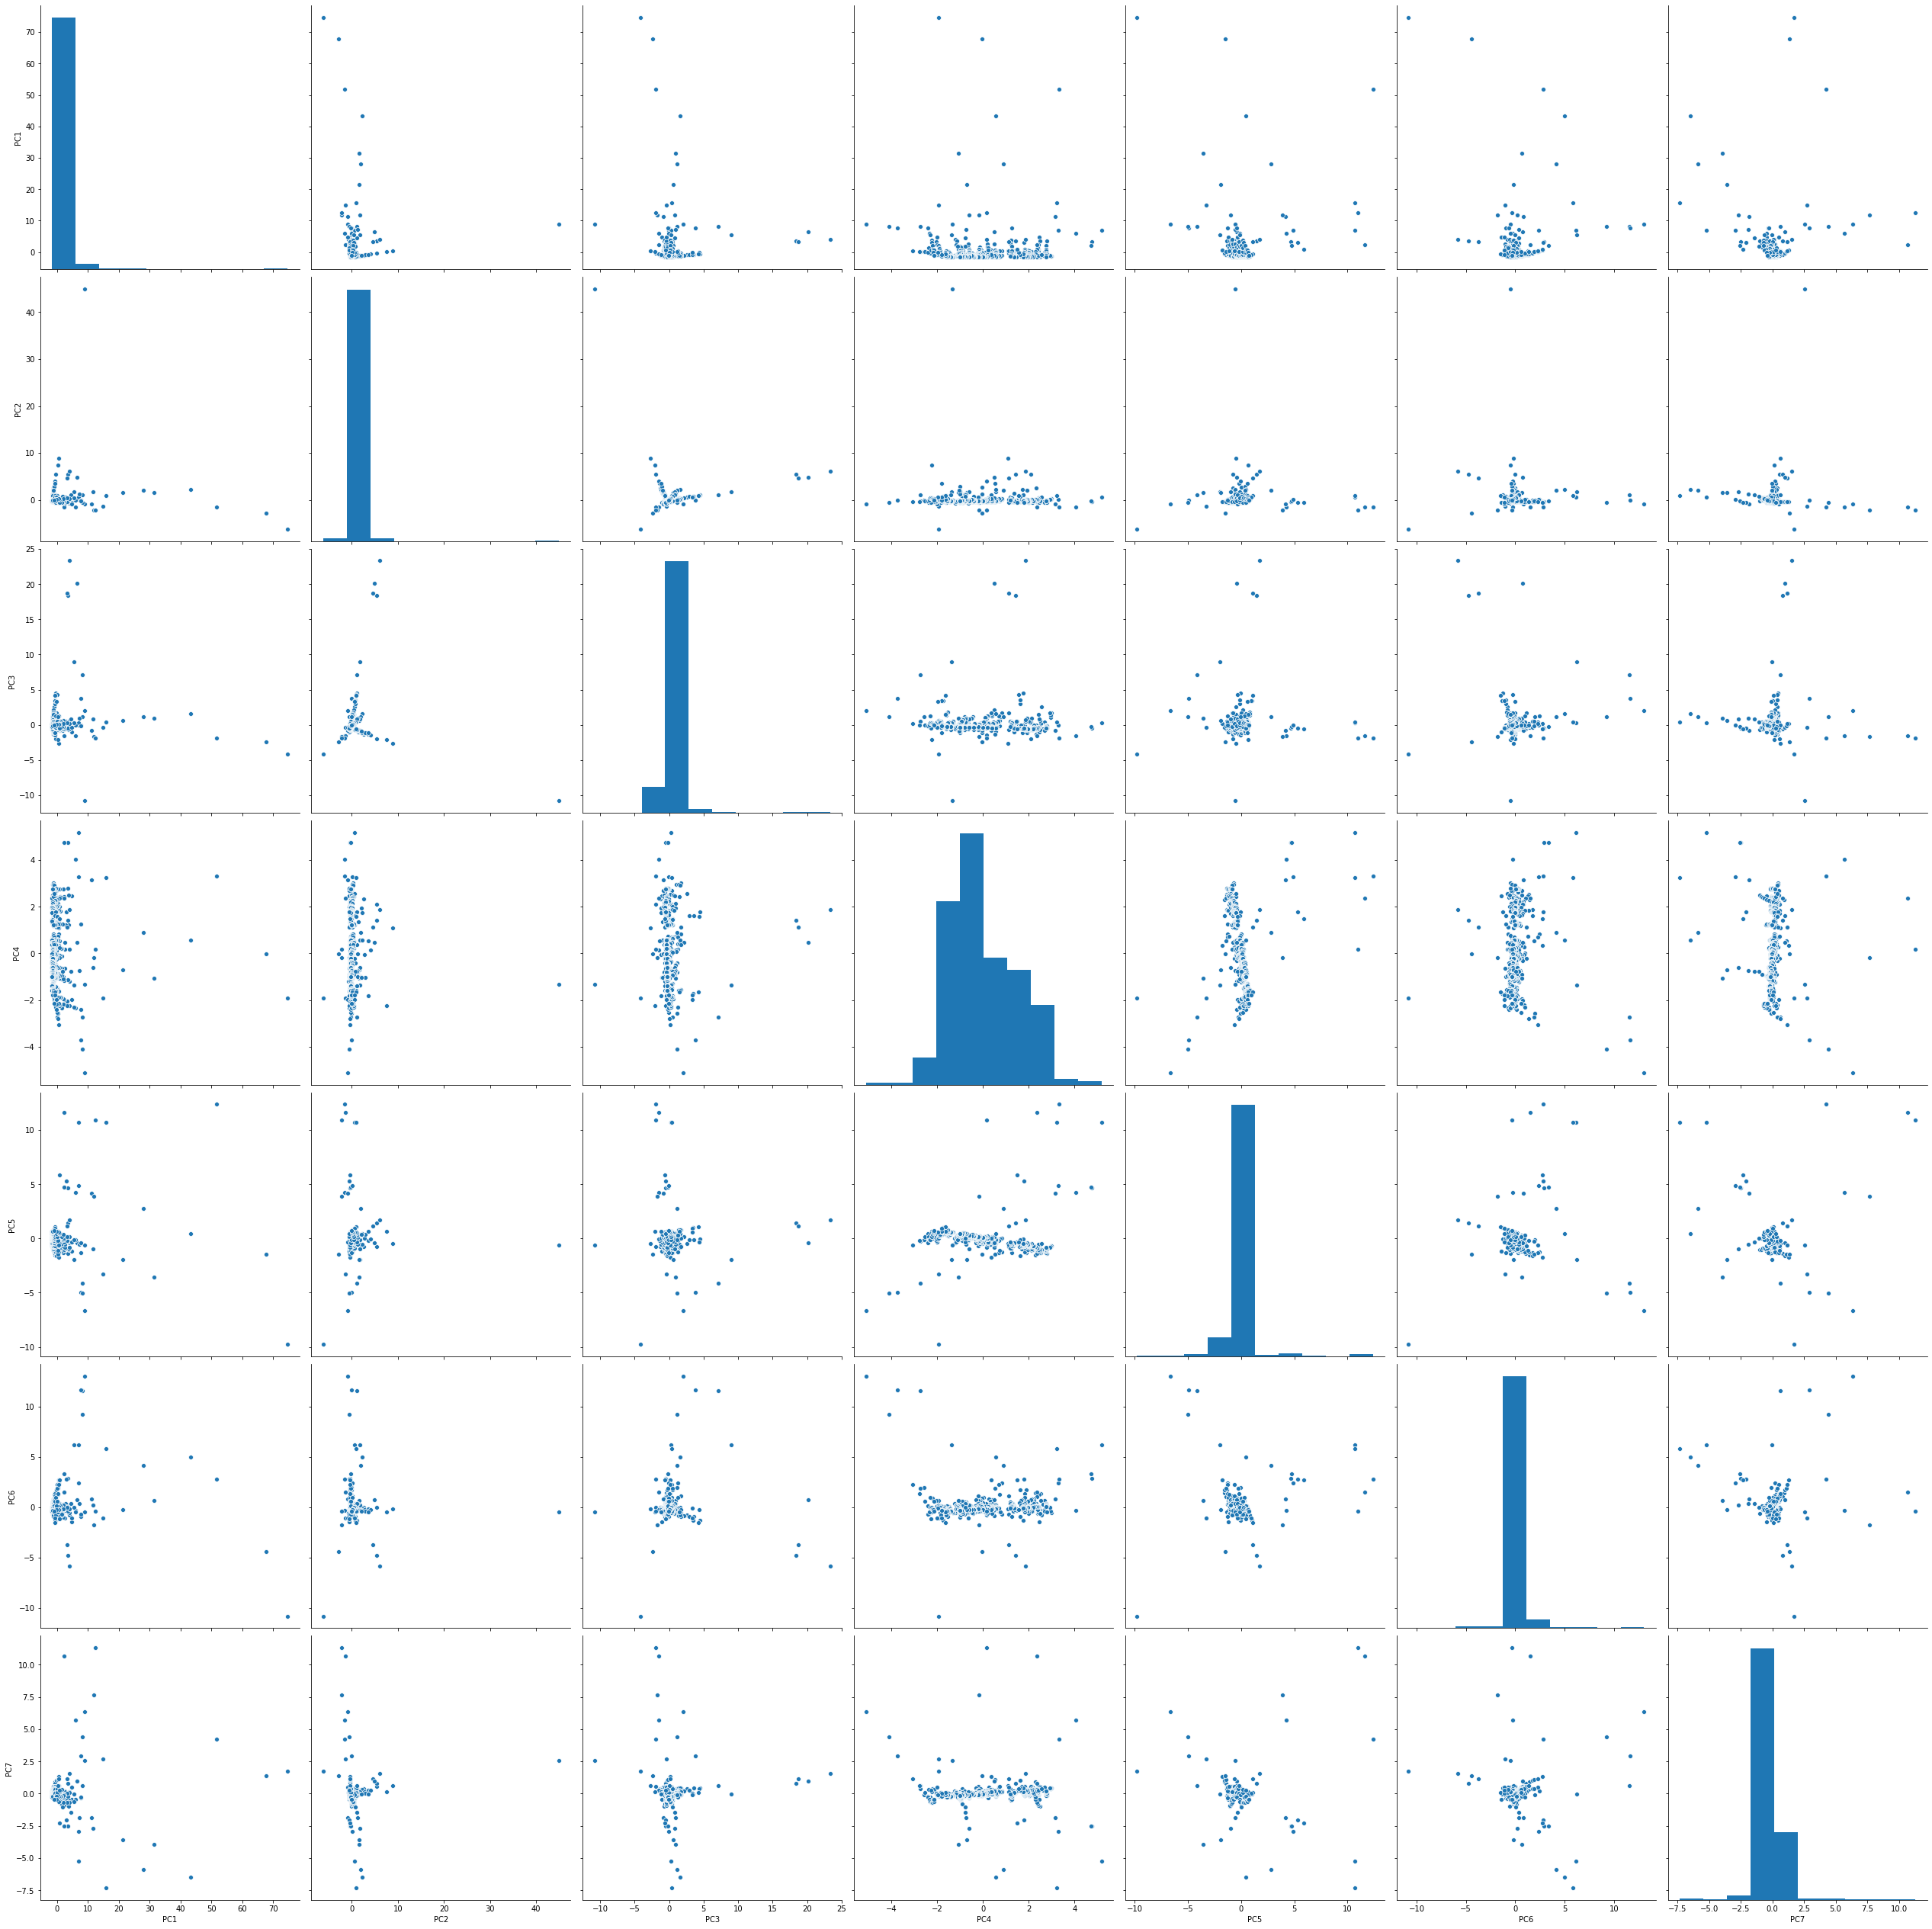

In [40]:
sns.pairplot(df_data_pca_transform,height=5)

In [41]:
#Calculating the Hopkins statistic

def hopkins(X):
    pca_transform_cols , pca_transform_rows = X.shape[1], X.shape[0]
    samp_len = int(0.1 * pca_transform_rows) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, pca_transform_rows, 1), samp_len)
 
    ujd = []
    wjd = []
    for j in range(0, samp_len):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),pca_transform_cols).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [42]:
#Let's check the Hopkins measure
hopkins(df_data_pca_transform.drop(['Area Name','Age-Group'], axis = 1))

0.9745135199936898

### K-Means Clustering
#### Find Optimal number of clusters

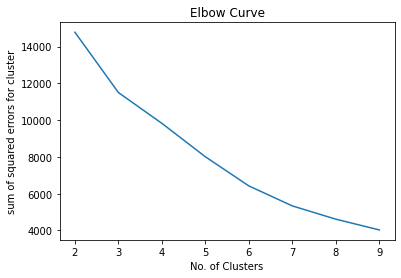

In [43]:
# elbow curve / SSD
ssd=[]
for num_clusters in list(range(2,10)):
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50,random_state=46)
    kmeans.fit(data_pca_transform)
    ssd.append(kmeans.inertia_)

plt.plot(range(2,10),ssd)
plt.xlabel('No. of Clusters')
plt.ylabel('sum of squared errors for cluster')
plt.title('Elbow Curve')
plt.show()

In [44]:
# Silhouette Analysis
silhouette_values=[]
for num_clusters in range(2,10):
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50,random_state=46)
    kmeans.fit(data_pca_transform)
    
    cluster_labels = kmeans.labels_
    silhouette_avg=silhouette_score(data_pca_transform,cluster_labels)
    silhouette_values.append(silhouette_avg)
    print('for ',num_clusters,' clusters the silhouette Score is: ',silhouette_avg)
    

for  2  clusters the silhouette Score is:  0.9241759430279362
for  3  clusters the silhouette Score is:  0.8193911175223467
for  4  clusters the silhouette Score is:  0.819564179703909
for  5  clusters the silhouette Score is:  0.7876061855685057
for  6  clusters the silhouette Score is:  0.7831724616246337
for  7  clusters the silhouette Score is:  0.3851678216630597
for  8  clusters the silhouette Score is:  0.3920641151689218
for  9  clusters the silhouette Score is:  0.4109466866298324


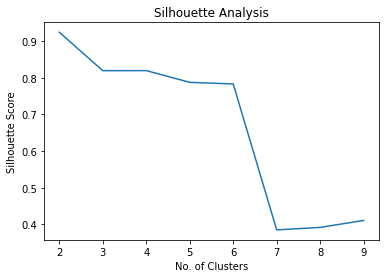

In [45]:
plt.plot(range(2,10),silhouette_values)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

#### Findings:
1. Both Silouette (Highest score is @ 4) and Elbow analysis (elbow drop is @ 4) signify 4 clusters as optimal, hence we build KMeans with 6 clusters

In [46]:
# Final KMeans model with k=4
kmeans=KMeans(n_clusters=4,max_iter=50,random_state=46)
kmeans.fit(data_pca_transform)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=46, tol=0.0001, verbose=0)

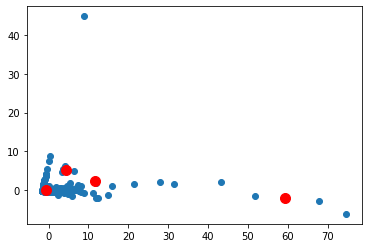

In [47]:
# Visualize Cluster centers for the clusters
plt.scatter(data_pca_transform[:,0],data_pca_transform[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red')
plt.show()

In [48]:
# Clusters Obtained through KMeans
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [49]:
# Assign Cluster ID to original Data Set
data['kmeans_clusterID'] = kmeans.labels_
data.head()

,Table Name,State Code,District Code,Town Code,Total/ Rural/ Urban,Area Name,Age-Group,Total - Persons,Total - Males,Total - Females,Illiterate - Persons,Illiterate - Males,Illiterate - Females,Literate - Persons,Literate - Males,Literate - Females,Educational Level - Literate without Educational Level Persons,Educational Level - Literate without Educational Level Males,Educational Level - Literate without Educational Level Females,Educational Level - Below Primary Persons,Educational Level - Below Primary Males,Educational Level - Below Primary Females,Educational Level - Primary Persons,Educational Level - Primary Males,Educational Level - Primary Females,Educational Level - Middle Persons,Educational Level - Middle Males,Educational Level - Middle Females,Educational Level - Matric/Secondary Persons,Educational Level - Matric/Secondary Males,Educational Level - Matric/Secondary Females,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Persons,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Males,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Females,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Graduate & Above Persons,Educational Level - Graduate & Above Males,Educational Level - Graduate & Above Females,Unclassified - Persons,Unclassified - Males,Unclassified - Females,kmeans_clusterID
1,C2308,29,1,40117000,Urban,Belgaum (M Corp.),0-6,47642,24768,22874,47642,24768,22874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,C2308,29,1,40117000,Urban,Belgaum (M Corp.),7,6759,3495,3264,1375,662,713,5384,2833,2551,48,28,20,5336,2805,2531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,C2308,29,1,40117000,Urban,Belgaum (M Corp.),8,8067,4152,3915,568,292,276,7499,3860,3639,15,11,4,7484,3849,3635,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,C2308,29,1,40117000,Urban,Belgaum (M Corp.),9,6948,3559,3389,275,137,138,6673,3422,3251,11,4,7,6291,3235,3056,371,183,188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,C2308,29,1,40117000,Urban,Belgaum (M Corp.),10,9586,5009,4577,368,164,204,9218,4845,4373,26,15,11,6624,3538,3086,2568,1292,1276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
# No. Of countries in each cluster
data['kmeans_clusterID'].value_counts()

1    726
0     22
3      4
2      4
Name: kmeans_clusterID, dtype: int64

In [51]:
# Details of Cluster 0, Since Cluster 0 is our target
data[data['kmeans_clusterID']==0].head()

,Table Name,State Code,District Code,Town Code,Total/ Rural/ Urban,Area Name,Age-Group,Total - Persons,Total - Males,Total - Females,Illiterate - Persons,Illiterate - Males,Illiterate - Females,Literate - Persons,Literate - Males,Literate - Females,Educational Level - Literate without Educational Level Persons,Educational Level - Literate without Educational Level Males,Educational Level - Literate without Educational Level Females,Educational Level - Below Primary Persons,Educational Level - Below Primary Males,Educational Level - Below Primary Females,Educational Level - Primary Persons,Educational Level - Primary Males,Educational Level - Primary Females,Educational Level - Middle Persons,Educational Level - Middle Males,Educational Level - Middle Females,Educational Level - Matric/Secondary Persons,Educational Level - Matric/Secondary Males,Educational Level - Matric/Secondary Females,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Persons,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Males,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Females,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Graduate & Above Persons,Educational Level - Graduate & Above Males,Educational Level - Graduate & Above Females,Unclassified - Persons,Unclassified - Males,Unclassified - Females,kmeans_clusterID
189,C2308,29,9,40902000,Urban,Hubli-Dharwad (M Corp.),20-24,81748,43285,38463,10660,4022,6638,71088,39263,31825,660,362,298,4110,2281,1829,10442,5235,5207,6044,3761,2283,17417,9466,7951,15983,8740,7243,743,486,257,3418,2657,761,12270,6274,5996,1,1,0,0
190,C2308,29,9,40902000,Urban,Hubli-Dharwad (M Corp.),25-29,69761,34143,35618,12411,3956,8455,57350,30187,27163,615,309,306,4235,2068,2167,9738,4264,5474,4352,2337,2015,13970,7148,6822,7824,4387,3437,548,393,155,2556,2054,502,13512,7227,6285,0,0,0,0
191,C2308,29,9,40902000,Urban,Hubli-Dharwad (M Corp.),30-34,58025,29499,28526,11740,4012,7728,46285,25487,20798,574,265,309,4014,1906,2108,8660,3986,4674,3176,1725,1451,11371,6033,5338,5344,3331,2013,460,378,82,2223,1784,439,10462,6078,4384,1,1,0,0
192,C2308,29,9,40902000,Urban,Hubli-Dharwad (M Corp.),35-39,58009,28061,29948,14311,4567,9744,43698,23494,20204,537,265,272,4560,2179,2381,10117,4481,5636,2863,1458,1405,10621,5478,5143,4223,2631,1592,290,239,51,1531,1188,343,8954,5573,3381,2,2,0,0
581,C2308,29,20,42009000,Urban,Bangalore (M Corp.),0-6,484982,249652,235330,484982,249652,235330,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
# Details of Cluster 0, Since Cluster 0 is our target
data[data['kmeans_clusterID']==1].head()

,Table Name,State Code,District Code,Town Code,Total/ Rural/ Urban,Area Name,Age-Group,Total - Persons,Total - Males,Total - Females,Illiterate - Persons,Illiterate - Males,Illiterate - Females,Literate - Persons,Literate - Males,Literate - Females,Educational Level - Literate without Educational Level Persons,Educational Level - Literate without Educational Level Males,Educational Level - Literate without Educational Level Females,Educational Level - Below Primary Persons,Educational Level - Below Primary Males,Educational Level - Below Primary Females,Educational Level - Primary Persons,Educational Level - Primary Males,Educational Level - Primary Females,Educational Level - Middle Persons,Educational Level - Middle Males,Educational Level - Middle Females,Educational Level - Matric/Secondary Persons,Educational Level - Matric/Secondary Males,Educational Level - Matric/Secondary Females,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Persons,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Males,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Females,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Graduate & Above Persons,Educational Level - Graduate & Above Males,Educational Level - Graduate & Above Females,Unclassified - Persons,Unclassified - Males,Unclassified - Females,kmeans_clusterID
1,C2308,29,1,40117000,Urban,Belgaum (M Corp.),0-6,47642,24768,22874,47642,24768,22874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,C2308,29,1,40117000,Urban,Belgaum (M Corp.),7,6759,3495,3264,1375,662,713,5384,2833,2551,48,28,20,5336,2805,2531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,C2308,29,1,40117000,Urban,Belgaum (M Corp.),8,8067,4152,3915,568,292,276,7499,3860,3639,15,11,4,7484,3849,3635,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,C2308,29,1,40117000,Urban,Belgaum (M Corp.),9,6948,3559,3389,275,137,138,6673,3422,3251,11,4,7,6291,3235,3056,371,183,188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,C2308,29,1,40117000,Urban,Belgaum (M Corp.),10,9586,5009,4577,368,164,204,9218,4845,4373,26,15,11,6624,3538,3086,2568,1292,1276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
# Details of Cluster 0, Since Cluster 0 is our target
data[data['kmeans_clusterID']==2].head()

,Table Name,State Code,District Code,Town Code,Total/ Rural/ Urban,Area Name,Age-Group,Total - Persons,Total - Males,Total - Females,Illiterate - Persons,Illiterate - Males,Illiterate - Females,Literate - Persons,Literate - Males,Literate - Females,Educational Level - Literate without Educational Level Persons,Educational Level - Literate without Educational Level Males,Educational Level - Literate without Educational Level Females,Educational Level - Below Primary Persons,Educational Level - Below Primary Males,Educational Level - Below Primary Females,Educational Level - Primary Persons,Educational Level - Primary Males,Educational Level - Primary Females,Educational Level - Middle Persons,Educational Level - Middle Males,Educational Level - Middle Females,Educational Level - Matric/Secondary Persons,Educational Level - Matric/Secondary Males,Educational Level - Matric/Secondary Females,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Persons,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Males,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Females,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Graduate & Above Persons,Educational Level - Graduate & Above Males,Educational Level - Graduate & Above Females,Unclassified - Persons,Unclassified - Males,Unclassified - Females,kmeans_clusterID
595,C2308,29,20,42009000,Urban,Bangalore (M Corp.),20-24,495210,262217,232993,46101,18670,27431,449109,243547,205562,4538,2527,2011,15281,8727,6554,57371,29714,27657,48158,26420,21738,117330,63991,53339,89001,45701,43300,5636,3715,1921,17171,12709,4462,94623,50043,44580,0,0,0,2
596,C2308,29,20,42009000,Urban,Bangalore (M Corp.),25-29,471166,241146,230020,58024,20628,37396,413142,220518,192624,4540,2348,2192,15729,7556,8173,56464,26577,29887,41088,21332,19756,107614,57765,49849,47091,24771,22320,5080,3624,1456,15227,11626,3601,120308,64919,55389,1,0,1,2
597,C2308,29,20,42009000,Urban,Bangalore (M Corp.),30-34,363883,194308,169575,50025,19140,30885,313858,175168,138690,3419,1757,1662,12621,6342,6279,45618,22429,23189,29685,15645,14040,85391,47784,37607,31942,18112,13830,3470,2684,786,10883,8604,2279,90826,51810,39016,3,1,2,2
598,C2308,29,20,42009000,Urban,Bangalore (M Corp.),35-39,347865,180151,167714,62161,22549,39612,285704,157602,128102,3647,1836,1811,14457,6944,7513,49951,23969,25982,26961,13945,13016,78794,43054,35740,27001,15548,11453,2124,1688,436,6741,5233,1508,76027,45384,30643,1,1,0,2


In [54]:
# Details of Cluster 0, Since Cluster 0 is our target
data[data['kmeans_clusterID']==3].head()

,Table Name,State Code,District Code,Town Code,Total/ Rural/ Urban,Area Name,Age-Group,Total - Persons,Total - Males,Total - Females,Illiterate - Persons,Illiterate - Males,Illiterate - Females,Literate - Persons,Literate - Males,Literate - Females,Educational Level - Literate without Educational Level Persons,Educational Level - Literate without Educational Level Males,Educational Level - Literate without Educational Level Females,Educational Level - Below Primary Persons,Educational Level - Below Primary Males,Educational Level - Below Primary Females,Educational Level - Primary Persons,Educational Level - Primary Males,Educational Level - Primary Females,Educational Level - Middle Persons,Educational Level - Middle Males,Educational Level - Middle Females,Educational Level - Matric/Secondary Persons,Educational Level - Matric/Secondary Males,Educational Level - Matric/Secondary Females,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Persons,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Males,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Females,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Graduate & Above Persons,Educational Level - Graduate & Above Males,Educational Level - Graduate & Above Females,Unclassified - Persons,Unclassified - Males,Unclassified - Females,kmeans_clusterID
582,C2308,29,20,42009000,Urban,Bangalore (M Corp.),7,73651,37865,35786,14231,7234,6997,59420,30631,28789,608,335,273,58812,30296,28516,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
583,C2308,29,20,42009000,Urban,Bangalore (M Corp.),8,82342,41286,41056,8077,3979,4098,74265,37307,36958,358,191,167,73907,37116,36791,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
584,C2308,29,20,42009000,Urban,Bangalore (M Corp.),9,68691,34343,34348,4613,2285,2328,64078,32058,32020,268,154,114,58182,29321,28861,5628,2583,3045,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
585,C2308,29,20,42009000,Urban,Bangalore (M Corp.),10,95954,49319,46635,6706,3276,3430,89248,46043,43205,371,218,153,57514,30705,26809,31363,15120,16243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


### Visualize data after assigning cluster ID to Original Data

<AxesSubplot:xlabel='kmeans_clusterID', ylabel='Total - Persons'>

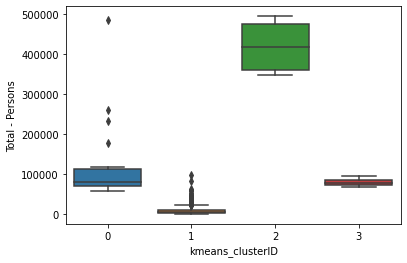

In [55]:
# Spread of Total - Persons for clusters formed
sns.boxplot(x='kmeans_clusterID', y='Total - Persons', data=data)

<AxesSubplot:xlabel='kmeans_clusterID', ylabel='Literate - Persons'>

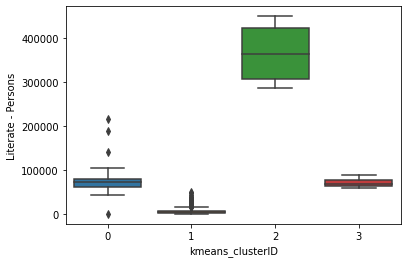

In [56]:
# Spread of Literate - Persons for clusters formed
sns.boxplot(x='kmeans_clusterID', y='Literate - Persons', data=data)

<AxesSubplot:xlabel='kmeans_clusterID', ylabel='Illiterate - Persons'>

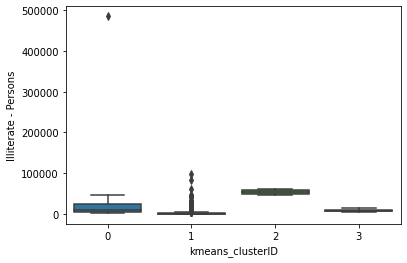

In [57]:
# Spread of Illiterate - Persons for clusters formed
sns.boxplot(x='kmeans_clusterID', y='Illiterate - Persons', data=data)

<AxesSubplot:xlabel='kmeans_clusterID', ylabel='Educational Level - Literate without Educational Level Persons'>

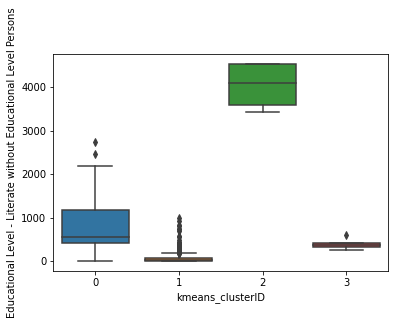

In [58]:
# Spread of Educational Level - Literate without Educational Level Persons for clusters formed
sns.boxplot(x='kmeans_clusterID', y='Educational Level - Literate without Educational Level Persons', data=data)

<AxesSubplot:xlabel='kmeans_clusterID', ylabel='Educational Level - Below Primary Persons'>

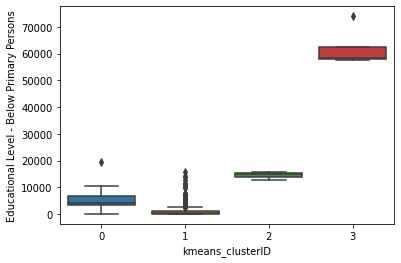

In [59]:
# Spread of Educational Level - Below Primary Persons for clusters formed
sns.boxplot(x='kmeans_clusterID', y='Educational Level - Below Primary Persons', data=data)

<AxesSubplot:xlabel='kmeans_clusterID', ylabel='Educational Level - Primary Persons'>

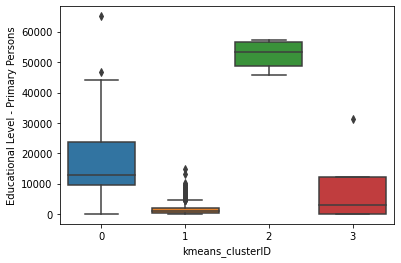

In [60]:
# Spread of Educational Level - Primary Persons for clusters formed
sns.boxplot(x='kmeans_clusterID', y='Educational Level - Primary Persons', data=data)

<AxesSubplot:xlabel='kmeans_clusterID', ylabel='Educational Level - Middle Persons'>

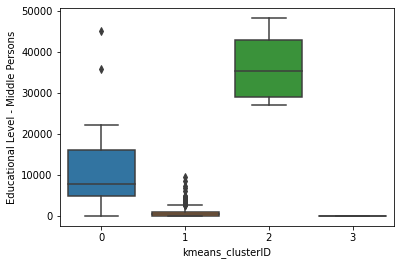

In [61]:
# Spread of Educational Level - Middle Persons for clusters formed
sns.boxplot(x='kmeans_clusterID', y='Educational Level - Middle Persons', data=data)

<AxesSubplot:xlabel='kmeans_clusterID', ylabel='Educational Level - Matric/Secondary Persons'>

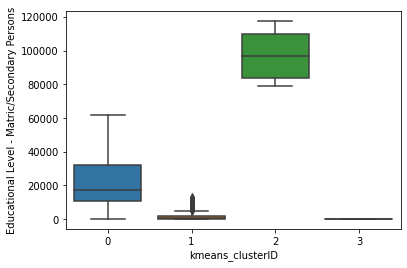

In [62]:
# Spread of Educational Level - Matric/Secondary Persons for clusters formed
sns.boxplot(x='kmeans_clusterID', y='Educational Level - Matric/Secondary Persons', data=data)

<AxesSubplot:xlabel='kmeans_clusterID', ylabel='Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Persons'>

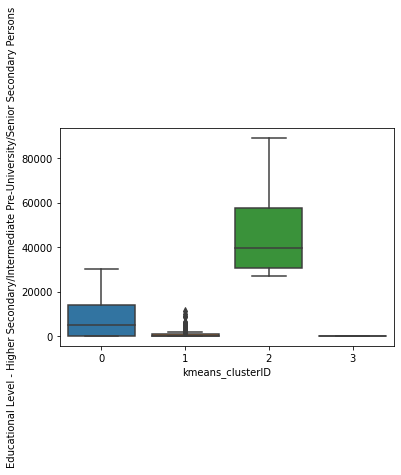

In [63]:
# Spread of Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Persons for clusters formed
sns.boxplot(x='kmeans_clusterID', y='Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Persons', data=data)

<AxesSubplot:xlabel='kmeans_clusterID', ylabel='Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Persons'>

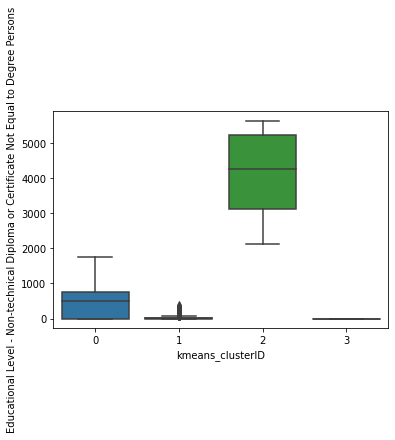

In [64]:
# Spread of Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Persons for clusters formed
sns.boxplot(x='kmeans_clusterID', y='Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Persons', data=data)

<AxesSubplot:xlabel='kmeans_clusterID', ylabel='Educational Level - Technical Diploma or Certificate Not Equal to Degree Persons'>

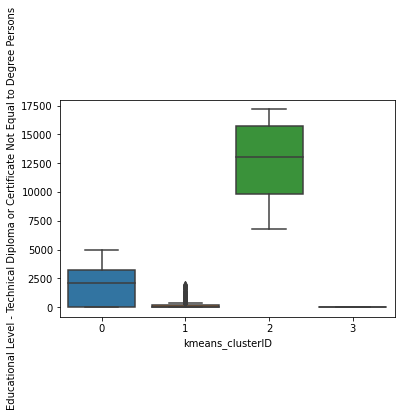

In [65]:
# Spread of Educational Level - Technical Diploma or Certificate Not Equal to Degree Persons for clusters formed
sns.boxplot(x='kmeans_clusterID', y='Educational Level - Technical Diploma or Certificate Not Equal to Degree Persons', data=data)

<AxesSubplot:xlabel='kmeans_clusterID', ylabel='Unclassified - Persons'>

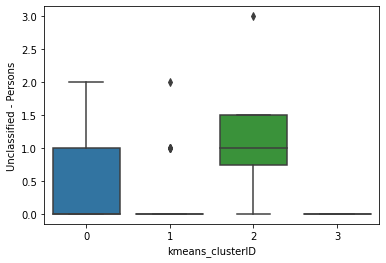

In [66]:
# Spread of Unclassified - Persons for clusters formed
sns.boxplot(x='kmeans_clusterID', y='Unclassified - Persons', data=data)

#### Insights:

1. From Visualizations, Cluster 0 has to be focused more.
2. Cluster 0 districts have Unclassified - Persons ,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Persons,Educational Level - Matric/Secondary Persons,Educational Level - Middle Persons,Educational Level - Primary Persons,Educational Level - Literate without Educational Level Persons,Illiterate - Persons and Total - Persons.

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

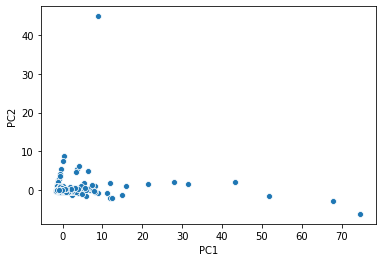

In [67]:
# PC1 Vs PC2 for CLusters Formed
sns.scatterplot(x='PC1',y='PC2' , data=df_data_pca_transform)

<AxesSubplot:xlabel='District Code', ylabel='Illiterate - Persons'>

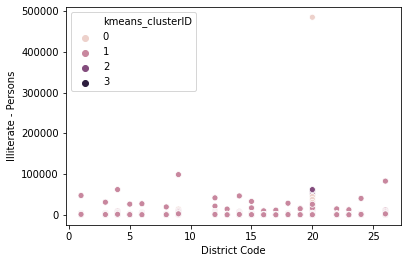

In [68]:
# GDPP Vs Income distribution for Clusterrs formed
sns.scatterplot(x='District Code',y='Illiterate - Persons',data=data,hue='kmeans_clusterID')

<AxesSubplot:xlabel='District Code', ylabel='Educational Level - Middle Persons'>

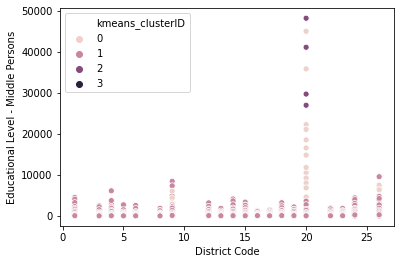

In [69]:
# GDPP Vs Income distribution for Clusterrs formed
sns.scatterplot(x='District Code',y='Educational Level - Middle Persons',data=data,hue='kmeans_clusterID')

### On adding both males and females gives total count of persons. So dropping columns which has Persons and dropping State Code because it has only constant values

In [75]:
# Details of Cluster 0, Since Cluster 0 is our target
data_0 = data[data['kmeans_clusterID']==0]

In [76]:
data_0['District Code'].unique()

array([ 9, 20, 26], dtype=int64)

In [79]:
# Details of Cluster 1
data_1 = data[data['kmeans_clusterID']==1]

In [80]:
data_1['District Code'].unique()

array([ 1,  3,  4,  5,  6,  8,  9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22,
       23, 24, 26], dtype=int64)